## Esercitazione di potenziamento del 30 Maggio 2023

-   Valutare in aritmetica floating point l'espressione
$$f(x)=\frac{1}{x}-\frac{1}{(x+0.04)}$$  nel vettore   $x=[10^0, 10^1,... ,10^{20}]$ contenente potenze successive  di $10$. 

                                                [1 punto]
- Calcolare l'indice di condizionamente del problema di valutare la funzione $f(x)$ al variare x e dedurre a partire da quale valore di x esso  assume valori molto elevati. Dire cosa rappresenta l'indice di condizionamento di un problema e dire cosa misura. 

                                                [5 punti]

- Calcolare $f(x)$ per il valore di x precedente  a quello individuato dal punto precedente. perturbare questo x del 10% ed indicarlo con xp. Calcolare l'errore relativo di xp rispetto ad x. Cosa si ottiene

                                                [1 punto]
    
- Determinare se la funzione $f(x)$ è numericamente stabile? E nel caso non lo sia individuare la causa della sua instabilità.

                                                [2 punti]
 
- Fornire una formula alternativa $g(x)$ algebricamente equivalente ma numericamente più stabile. 

                                                 [2 punti]
- Calcolare l'errore relativo della funzione $f(x)$ rispetto alla funzione $g(x)$ e visuarlo graficamente in scla logaritmica sia sulle ascisse che sulle ordinate

                                                [1 punto]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy.utilities.lambdify import lambdify


x=10.0**np.arange(21)    #utilizzo 10.0 per avere un numpy array x con dtype float.
f = lambda x: 1/x-1/(x+0.04);
fx=f(x)

Calcolo dell'indice di condizionamento

In [3]:
s=sym.symbols('s')
fs=1/s-1/(s+0.04); 
dfs=sym.diff(fs,s,1)
print( "Derivata di f : {}".format(dfs))

df_numerica= lambdify(s,dfs,np) 
f_numerica=lambdify(s,fs,np)

condizionamento=np.abs(df_numerica(x)*x/f_numerica(x))
spacing=np.spacing(x)
print(" x ",'\n', x)
print(" spacing ",'\n', spacing)
print("condizionamento ", condizionamento)
#Si nota che per x da 10**15 in avanti, l'indice di condizionamento esplode.
# Ricavare perchè per questo valore di x si ha questa situazione, ricorrendo 
#ad un'analisi dello valore di spacing per ciascun valore di x. Si vede
#che per l'intervallo dell'asse reale a cui x=10**15 appartiene
#lo spacing è 0.125, quindi quando a x=10**15 si somma il valore 0.04 che
#è più grande dello spacing, allora 1/(x+0.04) diventa 1/x e quindi l'operazione
#differenza produce un valore nullo per f.
#Parlare dell'insieme dei numeri finiti, da cosa dipende, come sono distrbuiti
#i numeri reali sull'intero asse reale e come sono distributi per
#ciascuna potenza della base [beta^p, beta^(p+1)]. Cosa si intende per spacing
#Dire cosa è l'indice di condizionamento e cosa misura.


Derivata di f : (s + 0.04)**(-2) - 1/s**2
 x  
 [1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10 1.e+11 1.e+12 1.e+13 1.e+14 1.e+15 1.e+16 1.e+17 1.e+18 1.e+19
 1.e+20]
 spacing  
 [2.22044605e-16 1.77635684e-15 1.42108547e-14 1.13686838e-13
 1.81898940e-12 1.45519152e-11 1.16415322e-10 1.86264515e-09
 1.49011612e-08 1.19209290e-07 1.90734863e-06 1.52587891e-05
 1.22070312e-04 1.95312500e-03 1.56250000e-02 1.25000000e-01
 2.00000000e+00 1.60000000e+01 1.28000000e+02 2.04800000e+03
 1.63840000e+04]
condizionamento  [1.96153846 1.99601594 1.99960016 1.99996    1.999996   1.9999996
 1.99999996 2.00000006 1.99999999 2.00000257 2.00000086 2.00052087
 2.00731911 1.98035137 2.13162821        inf        inf        inf
        nan        nan        nan]


C:\Users\DAMIAN~1\AppData\Local\Temp/ipykernel_21700/1650369805.py:9: RuntimeWarning: divide by zero encountered in divide
  condizionamento=np.abs(df_numerica(x)*x/f_numerica(x))
C:\Users\DAMIAN~1\AppData\Local\Temp/ipykernel_21700/1650369805.py:9: RuntimeWarning: invalid value encountered in divide
  condizionamento=np.abs(df_numerica(x)*x/f_numerica(x))


Il punto successivo è una verifica del fatto che l'indice di condizionamento rappresenta un fattore di amplificazione dell'errore sui dati, sui risultati del problema. 

In [4]:
xx=1e14
fxx=f(xx)
xxp=xx+0.1*xx
err_d=abs(xx-xxp)/abs(xx)
fxxp=f(xxp)
err_f=abs(fxxp-fxx)/abs(fxx)
print("Errore sui dati ",err_d)
print("Errore sui risultati ",err_f)


Errore sui dati  0.1
Errore sui risultati  0.3333333333333333


La funzione f(x) non è numericamente stabile, perchè per alcuni dei valori in cui la calcoliamo, si ha una somma algebrica di numeri molto vicini tra loro in modulo e con segno opposto che porta alla cancellazione di cifre significative. Riportare qui la formula dell'errore algoritmico che si ha quando al posto della somma di 2 numeri reali si sostituisce la somma tra i due numeri finiti.

Formulazione algebricamente equivalente che permette di eliminare l'operazione che porta instabilità, cioè la differenza.

Errore relativo  [2.16493490e-15 8.02797499e-15 2.71158963e-13 2.15687700e-12
 2.55655408e-11 1.61342693e-11 1.27584483e-09 4.53120658e-08
 1.49611282e-07 6.77929331e-07 1.61241409e-05 3.55460904e-04
 3.55460904e-04 2.18124775e-02 1.83291358e-01 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00]


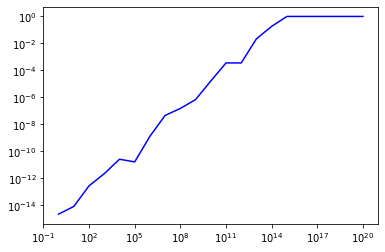

In [5]:
g = lambda x: 0.04/(x*(x+0.04))

#Calcoliamo l'errore relativo di f(x) rispetto alla formula equivalente ma numericamente stabile g(x)
Erelx=np.abs(f(x)-g(x))/np.abs(g(x))
print("Errore relativo ",Erelx)
plt.loglog(x,Erelx,'b-')

## Esercizo 2
Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``testC.mat.mat``.  Risolvere il sistema utilizzando il metodo più adatto al problema proposto. Argomentare dal punto di vista teorico la scelta fatta e commentare i risultati ottenuti  giustificandoli alla luce della teoria. 


La soluzione esatta del sistema lineare è il vettore x=[1,1,1,1...1 1].

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testC.mat')``

``A=dati["A"] ``

`` b=dati["b"] ``


                                                    [13 punti]

In [8]:
from scipy.io import loadmat
import numpy as np
import scipy.linalg as spl
dati = loadmat('testC.mat')
A=dati["A"] 
b=dati["b"]

In [9]:
n,m=A.shape
print("Dimensione di A",n,m)

Dimensione di A 34 34


In [10]:
nz=np.count_nonzero(A)/(n*m)
perc_nz=nz*100
print("Percentuale elementi diversi da zero ",perc_nz,"%")

Percentuale elementi diversi da zero  100.0 %


La matrice è di piccole dimensioni e densa, mi oriento verso i metodi diretti.

In [11]:
A=dati["A"]
flag=A==A.T
print(np.all(flag))  #La matrice è simmetrica

True


In [12]:
b=dati["b"]

Per verificare che la matrice simmetrica sia definita positiva è possibile utilizzare due criteri: 1) tutti gli autovalori reali positivi, 2) Criterio di Silvester: i determinanti di tutte le sottomatrici principali di testa devono essere positivi.

In [13]:
eig=np.linalg.eigvals(A)

In [14]:
def_pos=np.all(eig>0)
print(def_pos) #Matrice non definita positiva

False


La matrice non è definita positiva, scarto quindi il metodo di soluzione basato sulla fattorizzazione di Cholesky.
Dal calcolo dell'indice di condizionamento trovo che si tratta di una matrice molto mal condizionata, preferibile usare metodo basato sulla fattorizzazione QR, che è più stabile. Dire che cosa significa stabilità di un metodo di fattorizzazione, da cosa dipende e dire da cosa sono maggiorati gli elementi delle matrici Q ed R.

In [24]:
condA=np.linalg.cond(A)

In [25]:
print(condA)


240857863978.9025


In [26]:
 xesatta=np.ones_like(b)

In [27]:
import RisolviSis as RS

In [28]:
Q,R=spl.qr(A)

In [29]:
yy=Q.T@b
xqr,flag=RS.Usolve(R,yy)

calcolo l'errore relativo della soluzione ottenuta utilizzando il mteodo QR rispetto alla soluzione esatta


In [30]:
err_QR=np.linalg.norm(xqr-xesatta)/np.linalg.norm(xesatta)

In [31]:
print("Errore percentuale soluzione QR ",err_QR*100)


Errore percentuale soluzione QR  0.0002894042703999869


Risolvo il sistema lineare anche con il metodo di fattorizzazione LU con pivotaggio a perno massimo per colonne, per fare vedere che l'errore relativo sulla soluzione usando il metodo di fattorizzazione LU è maggiore rispetto a quello calc

In [32]:
PT,L,U=spl.lu(A)
P=PT.T
y,flag=RS.Lsolve(L,P@b)
if flag==0:
    xLU,flag1=RS.Usolve(U,y)
    
err_LU=np.linalg.norm(xLU-xesatta)/np.linalg.norm(xesatta)
print("Errore percentuale soluzione LU ",err_LU*100)

Errore percentuale soluzione LU  0.0009531414801843099


Come atteso, l'errore relativo della soluzione rispetto alla soluzione esatta è più piccolo nel caso in cui la soluzione sia calcolata con il metodo QR.